# Import the libraries

In [965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Import the dataset

In [966]:
df = pd.read_csv('cov_tsa.csv',parse_dates=['REPORT_DATE'])
df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,7844,Oneida,New York,2020-12-13,America,New York Times,1,36065.0,USA,United States,US,237,188
1,1830,Oneida,New York,2020-07-13,America,New York Times,3,36065.0,USA,United States,US,7,104
2,1776,Oneida,New York,2020-07-08,America,New York Times,1,36065.0,USA,United States,US,16,99
3,19215,Oneida,New York,2021-02-16,America,New York Times,2,36065.0,USA,United States,US,29,462
4,676,Oneida,New York,2020-05-12,America,New York Times,1,36065.0,USA,United States,US,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634240,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,MAF,St Martin,MF,0,0
1634241,0,NaN,Macau,2020-01-21,Asia,JHU CSSE Global Timeseries,0,NaN,CHN,China,CN,0,0
1634242,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,BRB,Barbados,BB,0,0
1634243,0,NaN,NaN,2020-01-21,Europe,JHU CSSE Global Timeseries,0,NaN,RUS,Russia,RU,0,0


#### Check for missing data

In [967]:
df.isna().sum()

PEOPLE_POSITIVE_CASES_COUNT             0
COUNTY_NAME                        124931
PROVINCE_STATE_NAME                 98654
REPORT_DATE                             0
CONTINENT_NAME                       1844
DATA_SOURCE_NAME                        0
PEOPLE_DEATH_NEW_COUNT                  0
COUNTY_FIPS_NUMBER                 150747
COUNTRY_ALPHA_3_CODE                 1844
COUNTRY_SHORT_NAME                      0
COUNTRY_ALPHA_2_CODE                 2305
PEOPLE_POSITIVE_NEW_CASES_COUNT         0
PEOPLE_DEATH_COUNT                      0
dtype: int64

###### Remove unwanted columns

In [968]:
cols=['PEOPLE_POSITIVE_CASES_COUNT','COUNTY_NAME','PROVINCE_STATE_NAME','CONTINENT_NAME','DATA_SOURCE_NAME','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_ALPHA_2_CODE','PEOPLE_DEATH_COUNT']
df.drop(cols,axis=1,inplace=True)
df.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7


###### Again check for missing data

In [969]:
df.isna().sum()

REPORT_DATE                        0
PEOPLE_DEATH_NEW_COUNT             0
COUNTRY_SHORT_NAME                 0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
dtype: int64

###### Take only datas of USA

In [970]:
usa = df[df['COUNTRY_SHORT_NAME']=='United States']
usa

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7
...,...,...,...,...
1538886,2020-01-21,0,United States,0
1538887,2020-01-21,0,United States,0
1538888,2020-01-21,0,United States,0
1538889,2020-01-21,0,United States,0


###### Take deaths data

In [971]:
usa_deaths = usa[['REPORT_DATE','PEOPLE_DEATH_NEW_COUNT']]
usa_deaths

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT
0,2020-12-13,1
1,2020-07-13,3
2,2020-07-08,1
3,2021-02-16,2
4,2020-05-12,1
...,...,...
1538886,2020-01-21,0
1538887,2020-01-21,0
1538888,2020-01-21,0
1538889,2020-01-21,0


###### Aggregate the case reports happened on same dates

In [972]:
usa_deaths = usa_deaths.groupby('REPORT_DATE')['PEOPLE_DEATH_NEW_COUNT'].sum().reset_index()
usa_deaths

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
456,2021-04-21,-125
457,2021-04-22,911
458,2021-04-23,873
459,2021-04-24,725


###### Change the index of the dataframe to dates

In [973]:
usa_deaths = usa_deaths.set_index('REPORT_DATE')
usa_deaths

,PEOPLE_DEATH_NEW_COUNT
REPORT_DATE,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
...,...
2021-04-21,-125
2021-04-22,911
2021-04-23,873


In [974]:
#we found that there is an error in one record .it's given as negative value
usa_deaths.loc['2021-04-21']

PEOPLE_DEATH_NEW_COUNT   -125
Name: 2021-04-21 00:00:00, dtype: int64

In [975]:
usa_deaths.loc['2021-04-21'] = 125

In [976]:
usa_deaths.loc['2021-04-21']

PEOPLE_DEATH_NEW_COUNT    125
Name: 2021-04-21 00:00:00, dtype: int64

###### Check the frequency followed by index dates

In [977]:
usa_deaths.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq=None)

###### Indicate the frequency is happening by day

In [978]:
usa_deaths.index.freq='D'

In [979]:
usa_deaths.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq='D')

# ets decomposition

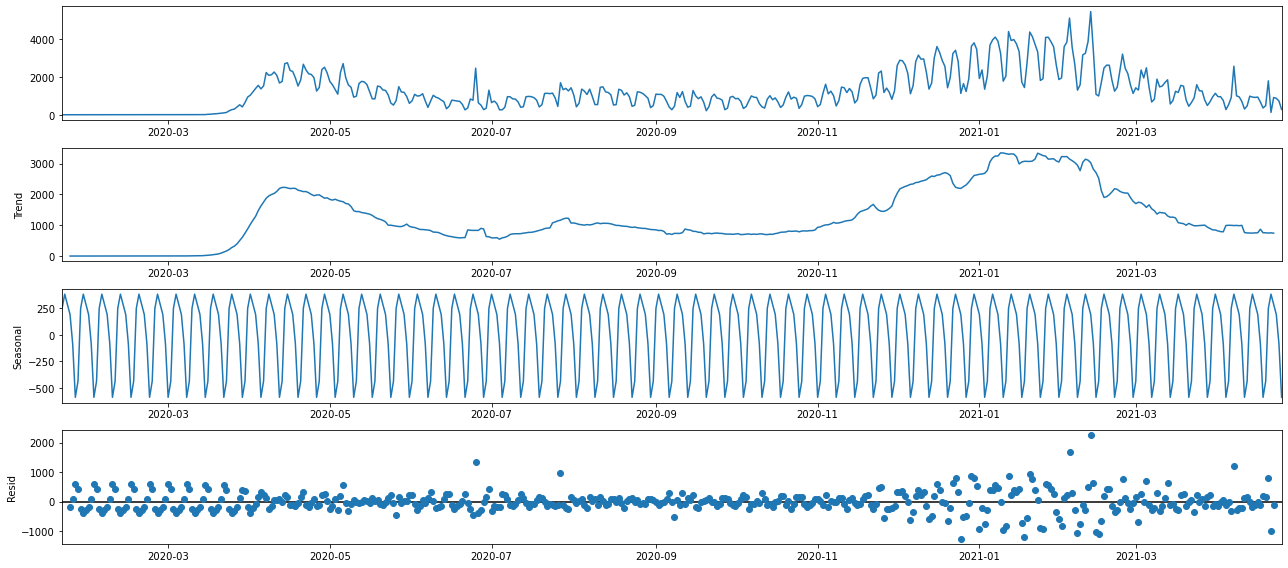

In [980]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_usa_deaths = sm.tsa.seasonal_decompose(usa_deaths,model='additive')
decomposition_usa_deaths.plot();

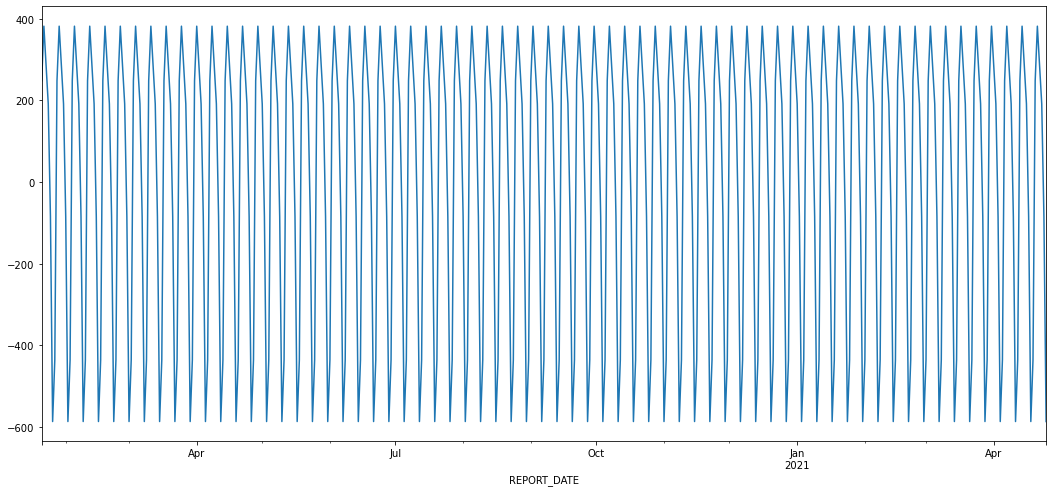

In [981]:
decomposition_usa_deaths.seasonal.plot();

# Train test split

In [982]:
len(usa_deaths)

461

In [983]:
len(usa_deaths)-14

447

In [984]:
train_usa_deaths = usa_deaths.iloc[:447]
test_usa_deaths = usa_deaths.iloc[447:]

In [985]:
len(test_usa_deaths)

14

# Scale Data

In [986]:
from sklearn.preprocessing import MinMaxScaler

In [987]:
scaler = MinMaxScaler()

In [988]:
scaler.fit(train_usa_deaths)

MinMaxScaler()

In [989]:
scaled_train = scaler.transform(train_usa_deaths)
scaled_test = scaler.transform(test_usa_deaths)

# Time Series Generator

In [990]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [991]:
scaled_train

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.83049606e-04],


In [992]:
scaled_test

array([[0.08511807],
       [0.17993776],
       [0.17115138],
       [0.16785649],
       [0.17096833],
       [0.12392458],
       [0.06553176],
       [0.08877906],
       [0.32875709],
       [0.0228812 ],
       [0.16675819],
       [0.15980231],
       [0.13271096],
       [0.05161999]])

In [993]:
# define generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [994]:
len(scaled_train)

447

In [995]:
len(generator)

440

In [996]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [997]:
#Define the model
#Here we use stacked LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [998]:
# define model
#model = Sequential()
#model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [999]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 7, 100)            40800     
_________________________________________________________________
lstm_37 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [1000]:
# fit model
model.fit_generator(generator,epochs=15)

Epoch 1/15
440/440 [==============================] - 4s 5ms/step - loss: 0.0189
Epoch 2/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0134
Epoch 3/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0113
Epoch 4/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0112
Epoch 5/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0086
Epoch 6/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0084
Epoch 7/15
440/440 [==============================] - 2s 5ms/step - loss: 0.0087
Epoch 8/15
440/440 [==============================] - 3s 7ms/step - loss: 0.0092
Epoch 9/15
440/440 [==============================] - 3s 6ms/step - loss: 0.0082
Epoch 10/15
440/440 [==============================] - 3s 6ms/step - loss: 0.0072
Epoch 11/15
440/440 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 12/15
440/440 [==============================] - 3s 7ms/step - loss: 0.0064
Epoch 13/15
440/440 [====

In [1001]:
model.history.history.keys()

dict_keys(['loss'])

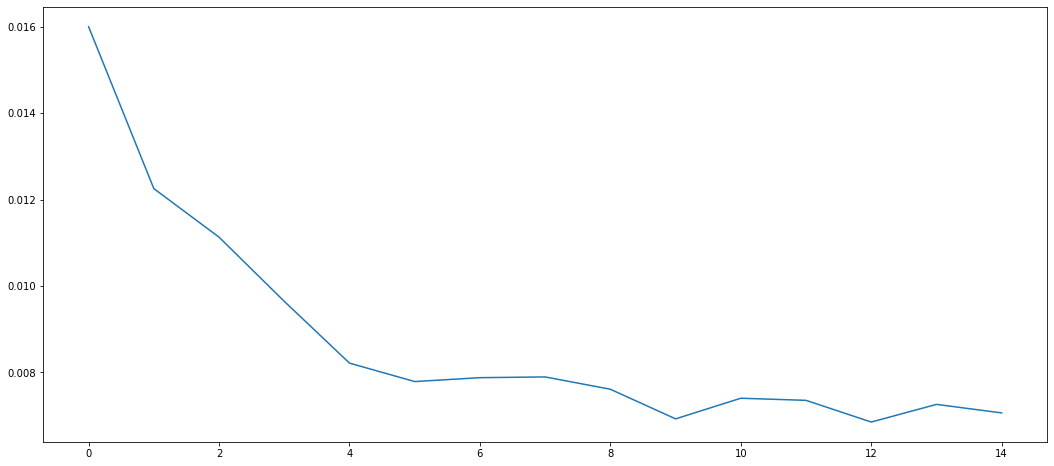

In [1002]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [1003]:
#test_predictions used to holding my predictions,bcz we wanna later plot it out
test_predictions = [] 

#last n input points from the training set
first_eval_batch = scaled_train[-n_input:]
#in Above step we grab the first evaluation batch

#reshape this to the format RNN wants(same format as TimeSeriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))


#How far into the future will i forecast

for i in range(len(test_usa_deaths)): #here we are only forecasting to the test length of the future
    
    #One time step ahead of historical 12 points
    current_pred = model.predict(current_batch)[0] #we give 0 here to reshape it to the format we need
    
    #Store that prediction
    test_predictions.append(current_pred)
    
    #then we are gonna update the current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
#rememeber the first current batch is essentailly gonna look like the first evaluation batch

In [1004]:
test_predictions

[array([0.13722382], dtype=float32),
 array([0.18536153], dtype=float32),
 array([0.32456172], dtype=float32),
 array([0.1903669], dtype=float32),
 array([0.18146685], dtype=float32),
 array([0.14227763], dtype=float32),
 array([0.12313793], dtype=float32),
 array([0.16396323], dtype=float32),
 array([0.19710678], dtype=float32),
 array([0.2587262], dtype=float32),
 array([0.19872405], dtype=float32),
 array([0.19189501], dtype=float32),
 array([0.16319174], dtype=float32),
 array([0.1550598], dtype=float32)]

In [1005]:
true_predictions = scaler.inverse_transform(test_predictions)

In [1006]:
true_predictions

array([[ 749.6537552 ],
       [1012.63006219],
       [1773.08064973],
       [1039.97434196],
       [ 991.35338876],
       [ 777.26268277],
       [ 672.70250364],
       [ 895.7311171 ],
       [1076.79433161],
       [1413.42128196],
       [1085.62946521],
       [1048.32242918],
       [ 891.51645237],
       [ 847.09168495]])

In [1007]:
test_usa_deaths

,PEOPLE_DEATH_NEW_COUNT
REPORT_DATE,
2021-04-12,465
2021-04-13,983
2021-04-14,935
2021-04-15,917
2021-04-16,934
2021-04-17,677
2021-04-18,358
2021-04-19,485
2021-04-20,1796


In [1008]:
test_usa_deaths['Predictions'] = true_predictions

In [1009]:
test_usa_deaths

,PEOPLE_DEATH_NEW_COUNT,Predictions
REPORT_DATE,,
2021-04-12,465,749.653755
2021-04-13,983,1012.630062
2021-04-14,935,1773.080650
2021-04-15,917,1039.974342
2021-04-16,934,991.353389
2021-04-17,677,777.262683
2021-04-18,358,672.702504
2021-04-19,485,895.731117
2021-04-20,1796,1076.794332


<AxesSubplot:xlabel='REPORT_DATE'>

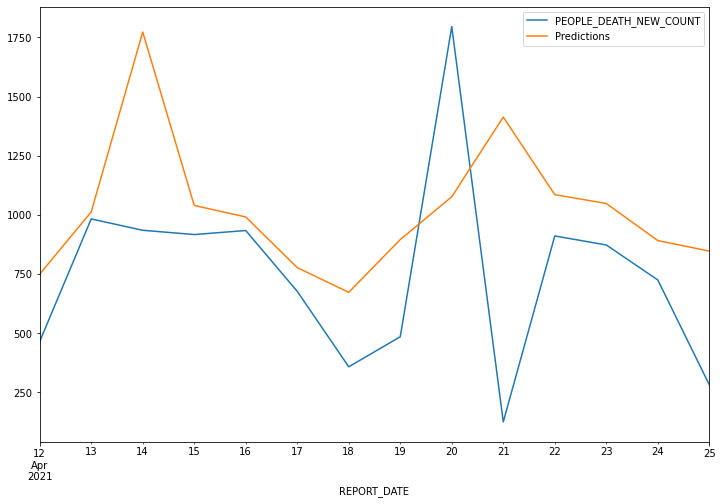

In [1010]:
test_usa_deaths.plot(figsize=(12,8))